# Project 4, APS1070 Summer 2023
#### **Linear Regression -  16 points**
**Deadline: July 18th, 23:00**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Please fill out the following:


*   Your **name**: Sari Daniel Tarabay
*   Your **student number**: 1009685057

### How to submit **(HTML [This notebook] + IPYNB + GitHub [Part 6])**

1. Download your notebook: `File -> Download .ipynb`

2. Click on the Files icon on the far left menu of Colab

3. Select & upload your `.ipynb` file you just downloaded, and then obtain its path (right click) (you might need to hit the Refresh button before your file shows up)


4. execute the following in a Colab cell:
```
%%shell
jupyter nbconvert --to html /PATH/TO/YOUR/NOTEBOOKFILE.ipynb
```

5. An HTML version of your notebook will appear in the files, so you can download it.

6. Submit **both** <font color='red'>`HTML` and `IPYNB`</font>  files for this notebook on Quercus for grading.

7. Make sure you compeleted the last part on <font color='red'>**GitHub**</font> and added your link to the last cell here. The teaching team will view and grade your part 7 on GitHub.



Ref: https://stackoverflow.com/a/64487858

## Part 1 - Getting Started [2 marks]

In this project, we are going to design a mathematical model that predicts electrical grid stability, as described in the paper below:

*Schäfer, Benjamin, et al. 'Taming instabilities in power grid networks by decentralized control.' The European Physical Journal Special Topics 225.3 (2016): 569-582.*

The following dataset contains 10000 instances, where each instance is a set of 12 features describing the grid's status. Our goal is to use these features to predict the `stab` column, which is a characteristic of the grid that represents its stability. We will make our predictions by implementing linear regression. Note that you can ignore the last column named `stabf` since this is a binary indicator showing whether the stability is above a certain threshold.

In [3]:
%%shell
jupyter nbconvert --to html /content/S23_APS1070_Project_4.ipynb

[NbConvertApp] Converting notebook /content/S23_APS1070_Project_4.ipynb to html
[NbConvertApp] Writing 2463142 bytes to /content/S23_APS1070_Project_4.html


**Link to Repository:**
https://github.com/APS1070-S23-Project-4/project-4-sdt2022-code

In [ ]:
import pandas as pd
import numpy as np

df=pd.read_csv("https://raw.githubusercontent.com/APS1070-W23/datasets/main/electrical_grid_stability_simulated_data.csv" , skipinitialspace=True)

Here are the steps to complete this portion:

1. Print the dataframe.
2. Prepare your dataset as follows: **[1.5]**
*   Using `train_test_split` from Sklearn, split the dataset into training and validation sets ($80\%$ training, $20\%$ validation). When splitting, set `random_state=1`. **[0.5]**
*   Standardize the data **manually** according to the same method as `StandardScaler` from sklearn, but you may not directly use `StandardScaler'. **[0.5]**
*   Insert a first column of all $1$s in both the training and validation data sets.**[0.5]**
3. Explain why we should not insert the column of $1$s prior to standardization. **[0.5]**

  * We do not include the column of 1s before standardization because it is a constant column for all datapoints which represents the bias. Its standard deviation is equal to 0 and therefore this column can not be standardized.

In [ ]:
### YOUR CODE HERE ###

#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy import linalg
import matplotlib.pyplot as plt



In [ ]:
# visualising the data
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
#dropping the stabf column
df = df.drop('stabf', axis=1)
df.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860


In [ ]:
df.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


In [ ]:
#splitting the data

X = df.drop('stab' , axis =1)
y = df[['stab']]

X_train, X_val , y_train ,y_val = train_test_split(X , y ,test_size = 0.2, random_state = 1)

print('Number of training datapoints: ' , len(X_train))
print('Number of validation datapoints: ' , len(X_val) )


Number of training datapoints:  8000
Number of validation datapoints:  2000


In [ ]:
# Standardizing the training dataset
X_train_stand = (X_train - X.mean()) / X_train.std()
X_train_stand.describe()  # notice the mean and standard deviation is equal to 0 and 1 respectively.

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,-0.000725,-0.001785,-0.000945,-0.001023,0.001187,-0.003478,0.000382,0.001012,-0.003546,0.000364,0.001228,0.000376
std,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
min,-1.730584,-1.732280,-1.737992,-1.737764,-2.858404,-1.732714,-1.727659,-1.725679,-1.729351,-1.729910,-1.733742,-1.731942
25%,-0.861882,-0.867724,-0.869293,-0.862241,-0.698959,-0.873602,-0.868385,-0.860686,-0.873913,-0.868331,-0.861882,-0.866043
50%,0.002037,-0.006488,0.000987,-0.004781,-0.001405,-0.007964,0.000966,-0.006218,-0.009303,0.000474,0.004850,0.000854
75%,0.861259,0.859001,0.865776,0.862175,0.714083,0.870402,0.869609,0.869147,0.860782,0.864484,0.866749,0.863923
max,1.730680,1.732233,1.738077,1.737542,2.788517,1.733064,1.727619,1.725791,1.729157,1.729899,1.733004,1.731790


In [ ]:
# Standardizing the validation dataset
X_val_stand = (X_val - X_train.mean())/ X_train.std()
X_val_stand.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.003624,0.008925,0.004725,0.005117,-0.005933,0.017392,-0.001908,-0.005060,0.017732,-0.001821,-0.006140,-0.001881
std,0.997086,1.002789,1.018341,1.017381,0.959340,1.004023,0.988134,0.982461,0.992664,0.994858,1.005914,1.000478
min,-1.724564,-1.731021,-1.736061,-1.736339,-2.619144,-1.729581,-1.726917,-1.726113,-1.724659,-1.728130,-1.733791,-1.731579
25%,-0.878621,-0.853374,-0.867195,-0.892207,-0.708061,-0.834996,-0.840369,-0.872185,-0.819335,-0.850937,-0.891710,-0.866456
50%,-0.007088,0.015412,-0.003663,0.014106,0.009350,0.049512,-0.009830,0.020192,0.030276,-0.001660,-0.024392,-0.002678
75%,0.883294,0.895044,0.880676,0.894219,0.662586,0.854879,0.842069,0.827582,0.884682,0.865515,0.864793,0.868723
max,1.729397,1.734582,1.738533,1.738759,2.738359,1.733936,1.726737,1.724379,1.731477,1.727340,1.732642,1.730716


In [ ]:
# inserting s column of 1 (bias)

X_train_stand['bias_train'] = 1
X_val_stand['bias_val'] = 1
X_train_stand.head()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,bias_train
2694,0.366579,-0.987765,0.649461,1.546407,-0.290285,0.058053,1.294163,-0.844009,0.157362,0.340202,0.586759,0.492585,1
5140,-0.065379,0.087647,1.034069,-1.642415,0.621012,-0.070710,-1.502450,0.487594,-0.296672,-1.558026,1.430787,-1.443055,1
2568,-1.468483,1.296551,-0.503450,1.164950,-0.179323,0.487094,0.682898,-0.854236,1.395716,1.451807,-1.044449,0.492835,1
3671,0.819305,0.528102,1.298631,-1.142927,-0.811616,-0.767062,1.521866,0.659751,-0.961806,1.362238,1.605268,0.275662,1
7427,0.664658,-1.427323,0.311336,0.918056,-1.613008,0.756789,1.422312,0.640215,1.673244,0.695981,1.138661,-1.312116,1


## Part 2 - Linear Regression Using Direct Solution [1 marks]

Implement the direct solution of the linear regression problem on the training set. **[0.5]**

**Note: You should use scipy.linalg.inv to perform the inversion, as numpy.linalg.inv may caue an error.**

Report the root-mean-square error (RMSE) for both the training and validation sets. **[0.5]**

You may use `mean_squared_error` from Sklearn for computing the RMSE.

In [ ]:
### YOUR CODE HERE ###
theta_direct = linalg.inv(X_train_stand.T @ X_train_stand) @ X_train_stand.T @ y_train
theta_direct

,stab
0,0.009799
1,0.010345
2,0.010243
3,0.010287
4,29.455068
5,16.808513
6,16.862431
7,16.880788
8,0.010451
9,0.010687


In [ ]:
pred_stab_direct = X_train_stand.dot(theta_direct.to_numpy())
mse_train_loss_direct = mean_squared_error(y_train , pred_stab_direct)**0.5
print('The mse loss on the trianing dataset is:' , mse_train_loss_direct)

The mse loss on the trianing dataset is: 0.021941278053394946


In [ ]:
# mse loss for the validation dataset

pred_val_stab_direct = X_val_stand.dot(theta_direct.to_numpy())
mse_val_loss_direct = mean_squared_error(y_val , pred_val_stab_direct)**0.5
print('The mse loss on the validation dataset is: ', mse_val_loss_direct)

The mse loss on the validation dataset is:  0.021923452569443884


## Part 3 - Full Batch Gradient Descent [3 marks]

We will now implement a "full batch" gradient descent algorithm and record the training time for our model. Recall that the full batch gradient descent is,
 $$w_t = w_{t-1} - \alpha~g_t$$ where $\alpha$ is the learning rate and $g_t$ is your gradient, computed on the entire data.

Here are the steps for this part:

* Implement gradient descent for linear regression using a fixed learning rate of $\alpha= 0.01$, and iterate until your model's **validation** RMSE converges.

  We consider the gradient descent as having converged when RMSE on the validation set using gradient descent satisfies:

  $$ RMSE_\text{GD} \leq 1.001 \times RMSE_\text{Direct Solution}$$

  where $RMSE_\text{Direct Solution}$ is the RMSE on the validation set using the direct solution that you calculated in the previous part.

  We refer to the quantity $RMSE_\text{Direct Solution}\times 1.001$ as the convergence threshold (CT).

*  Record the training time (from the first iteration until convergence) using the `time.time()` function. Be sure to compute the gradients yourself! Take a look at the code provided in the tutorial. **[1]**

* Plot the training RMSE and the validation RMSE vs. epoch on the same figure.  **[1]**

* Comment on overfitting/underfitting by observing the training and validation RMSE **[1]**

  * It looks like the model is able to generalize well using the full batch gradient descent. The training and validation RMSE decrease monotonically and converge asymtotically to the same value.  
  * Note that training the model can be stopped at the number of epochs that satisfy the threshold convergence limit. If model training were to be continued for a greater number of epochs, we might experience overfitting as the model would progressively learn the noise in the training dataset.

**Hint**: Initialize your weights with small random numbers (<$0.001$)

In [ ]:
import time
import math

start_time = time.time() ## Records current time

## GD Script -- Sample code in tutorial! ##

#initialize the weights

w = 0.01*np.random.rand(13).reshape(X_train_stand.shape[1] ,1)
lr = 0.01
rmse_val_gd_list = []
rmse_train_gd_list =[]
rmse_val_gd = math.inf

while rmse_val_gd > 1.001 * mse_val_loss_direct:
  y_pred_train = np.dot(X_train_stand , w)
  #print('ytrain_pred : ' , y_pred_train.shape)
  y_pred_val = np.dot(X_val_stand , w)
  #print('yval_pred:', y_pred_val.shape)


  rmse_val_gd = mean_squared_error(y_val , y_pred_val)**0.5
  #print(rmse_val_gd)
  rmse_train_gd_list.append(mean_squared_error(y_train , y_pred_train)**0.5)
  rmse_val_gd_list.append(rmse_val_gd)

  #print(X_train_stand.shape)
  #print(y_train.shape)
  gradient = 1/len(y_pred_train) * np.dot(X_train_stand.T, y_pred_train-y_train)
  #print(gradient.shape)
  w = w - lr*gradient


print("--- Total Training Time: %s (s) ---" % (time.time() - start_time))

--- Total Training Time: 4.073351144790649 (s) ---


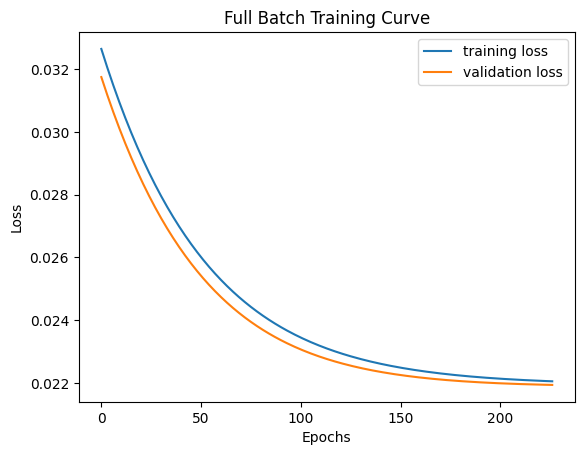

In [ ]:
plt.plot(rmse_train_gd_list , label = 'training loss')
plt.plot(rmse_val_gd_list , label ='validation loss')
plt.title('Full Batch Training Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Part 4 - Mini-batch and Stochastic Gradient Descent [4 marks]

Write a function that performs mini-batch gradient descent until the convergence threshold (CT) is reached. **[1]**

The inputs of that function are:
  * Input data (training/validation), Batch size, Learning Rate, Convergence Threshold (CT)

Your function will return the following arrays:
 * The final weights after training.
 * The training RMSE at each epoch.
 * The validation RMSE at each epoch.
 * An array that has the elapsed time from the start of the training process to the end of each epoch (e.g., if each epoch takes exactly 2 seconds, the array would look like: [2 4 6 8 ...]).

Notes:
* For certain batch sizes, GD might not converge to a solution. For that reason, you need to check the RMSE of the validation/training set at each epoch, and if it's getting larger and larger, you should stop the training for that case (the design is up to you!).
* CT will help you to know when your model is converged.
* **Important: after each epoch, you need to shuffle the entire training set.** This ensures that new mini-batches are selected for every epoch. Hint: use `np.random.permutation`.

Let's now use the function to investigate the effect of batch size on convergence. When the batch size is 1, we call that stochastic gradient descent. When the batch size equals the # of training data, it is full-batch (i.e., all data points are used at every iteration). Anywhere in between is mini-batch (we use some of the data).
  * Sweep different values for the mini-batch size (at least 5 values that **converge**), each time using a learning rate of $\alpha= 0.01$. **Hint: Try batch sizes that are powers of two (e.g., 2,4,8,16,32,64,128...).** These batch sizes fit better on the hardware and may achieve higher performance.  **[0.5]**

Provide the following $3$ plots:
  1.  Plot training and validation RMSE vs. **epoch** for all the **converging** batch sizes (some batch sizes might not converge) in a figure. The X-axis is Epoch # and the Y-axis is RMSE. **[0.5]**
  2. Plot training and validation RMSE vs. **time** for all the **converging** batch sizes in a figure. The X-axis is Time, and the Y-axis is RMSE. **[0.5]**
  3. Plot Total training time (y-axis) vs. Batch size (x-axis). **[0.5]**

Describe your findings, including the main takeaways from each of your plots. **[1]**

  * Key findings: For very small batch sizes, the model is underfitting and does not properly learn the distribution of the training dataset. This makes sense because a small batch size of 8 for instance does not capture enough information across all the datapoints.

  * For mid batch sizes, the training curve is not so stable, it depends on the suffuling of the dataset which can lead to abrupt increase of decrease in error from an epoch to another.

  * For large batch size, the model takes the longest to train and the training and validation error curve constantly decrease as the number of epochs increases. This makes sense because a large batch size captures a large amount of information and variability in the data, and therefore the weigths would most probably be updated and optimized "in the right direction" compared to a smaller batch size.

In [ ]:
### YOUR CODE HERE ###

def mini_gd(X_train , y_train, X_val , y_val, leaning_rate = 0.01,  batch_size = 2 , ct = 1.001*mse_val_loss_direct):

  sample_num = X_train.shape[0]
  num_batches = sample_num //batch_size
  w = 0.01*np.random.rand(X_train.shape[1]).reshape(X_train.shape[1] ,1)
  rmse_val_loss = math.inf
  #epochs = 0

  rmse_train_epoch = []
  rmse_val_epoch = []
  elapsed_time =[]
  did_converge = 1


  start_time = time.time()

  while rmse_val_loss > ct:
    indices = np.random.permutation(sample_num)
    X_train_shuffled = X_train.iloc[indices]
    y_train_shuffled = y_train.iloc[indices]

    for batch in range(num_batches):
      start = batch * batch_size
      end = (batch+1)* batch_size

      X_batch = X_train_shuffled[start:end]
      y_batch = y_train_shuffled[start:end]

      #print(X_batch.shape)
      #print(y_batch.shape)

      y_pred_train = np.dot(X_batch , w)
      #print(y_pred_train.shape)

      rmse_train_mini = mean_squared_error(y_batch , y_pred_train)**0.5

      gradient = 1/len(y_pred_train) * np.dot(X_batch.T, y_pred_train-y_batch)
      #print(gradient.shape)
      w = w - lr*gradient


    # performance on validtion set
    y_pred_val = np.dot(X_val , w)
    #print('yval_pred:', y_pred_val.shape)


    rmse_val_loss = mean_squared_error(y_val , y_pred_val)**0.5

    rmse_train_epoch.append(rmse_train_mini)
    rmse_val_epoch.append(rmse_val_loss)

    elapsed_time.append(time.time() - start_time)


    #stopping condition if model is not converging
    if len(rmse_train_epoch)>=2:
      if (rmse_train_epoch[-1]>1.5*rmse_train_epoch[-2]) or (rmse_val_epoch[-1] > 1.5*rmse_val_epoch[-2]):
        did_converge = 0
        break


  return w , rmse_train_epoch, rmse_val_epoch, elapsed_time, did_converge


In [ ]:
batch_list = [2**i for i in range(13)] + [X_train_stand.shape[0]]
batch_conv =[]
results = {}


for batch in batch_list:
  print(batch)
  w , rmse_train_epoch , rmse_val_epoch , elapsed_time, did_converge = mini_gd(X_train_stand , y_train, X_val_stand , y_val, leaning_rate = 0.01,  batch_size = batch , ct = 1.001*mse_val_loss_direct)

  if did_converge == 1:
    results[f'batch_size_{batch}'] = [rmse_train_epoch , rmse_val_epoch, elapsed_time]
    batch_conv.append(batch)

batch_not_conv = set(batch_list) - set(batch_conv)
print('The model did not converge for batch sizes equal to : ', batch_not_conv)



1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8000
The model did not converge for batch sizes equal to :  {1, 2, 4}


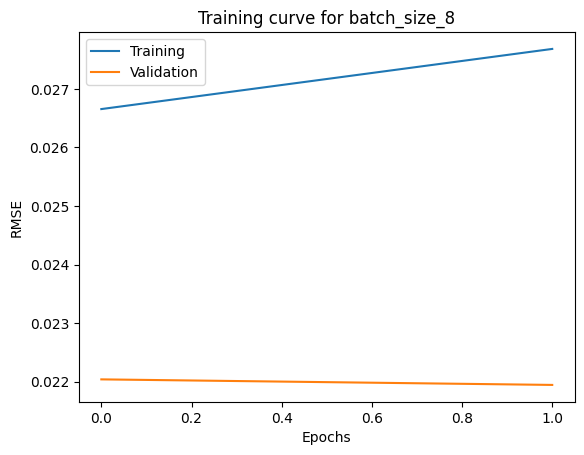

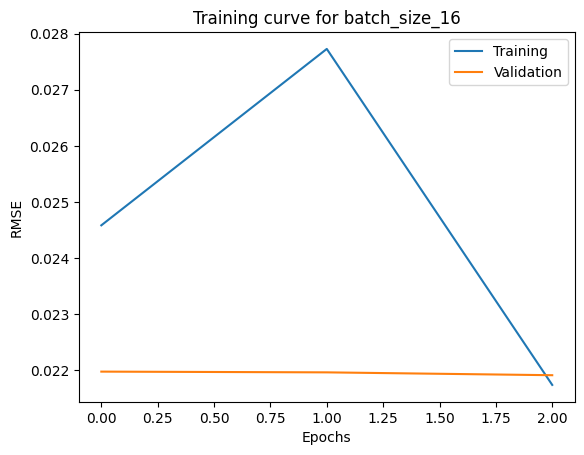

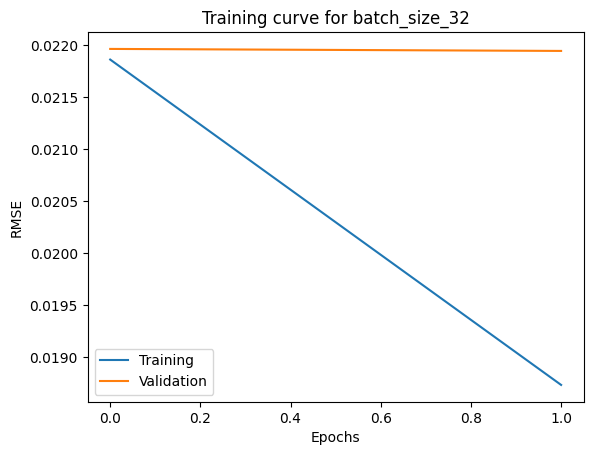

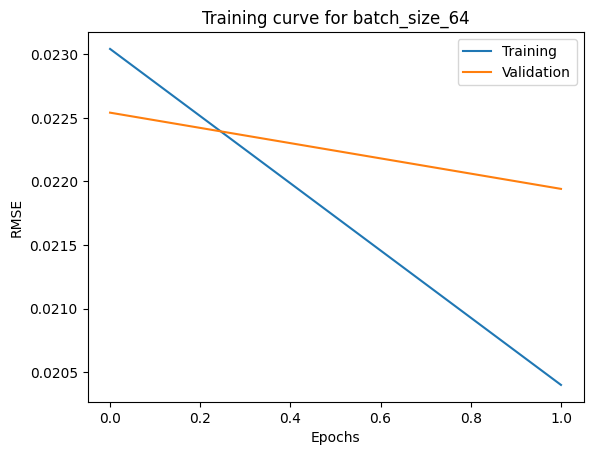

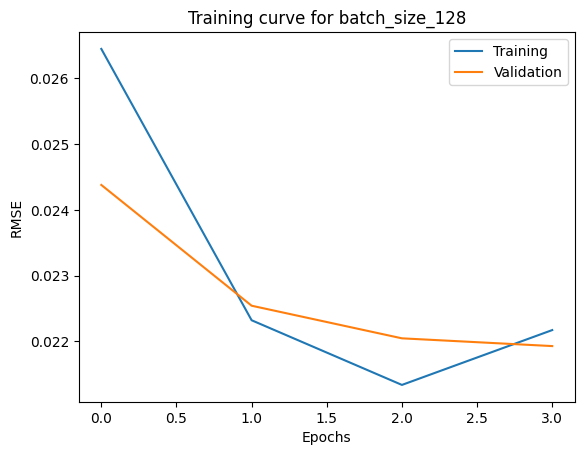

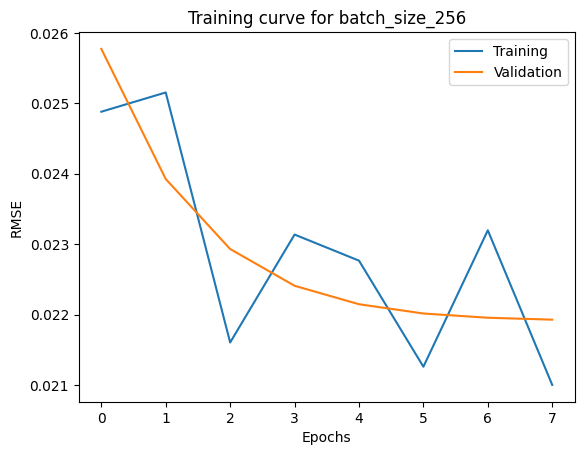

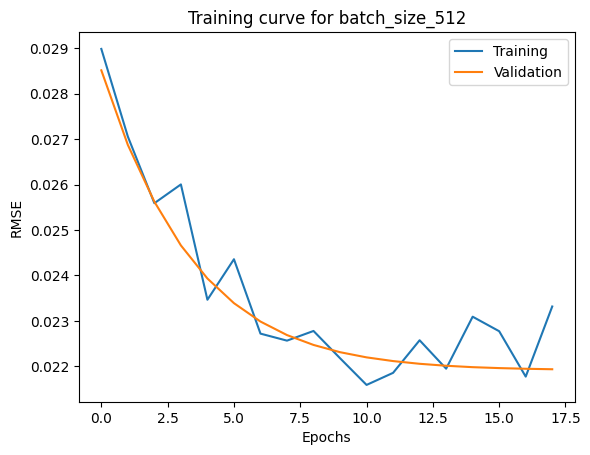

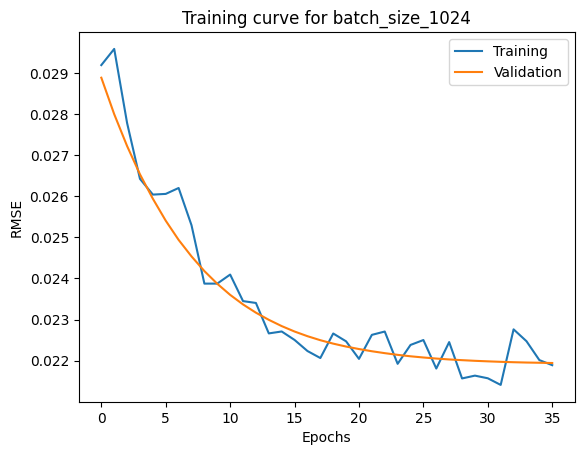

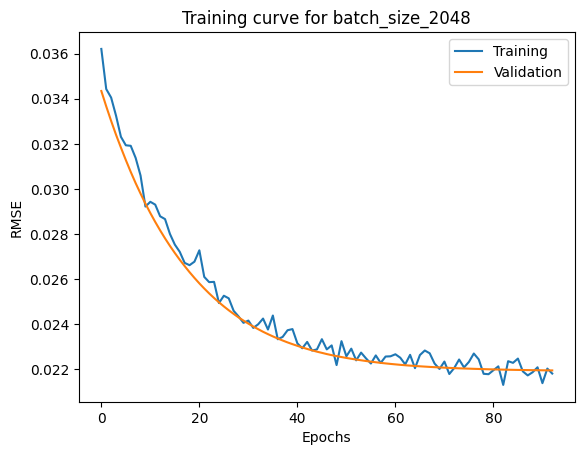

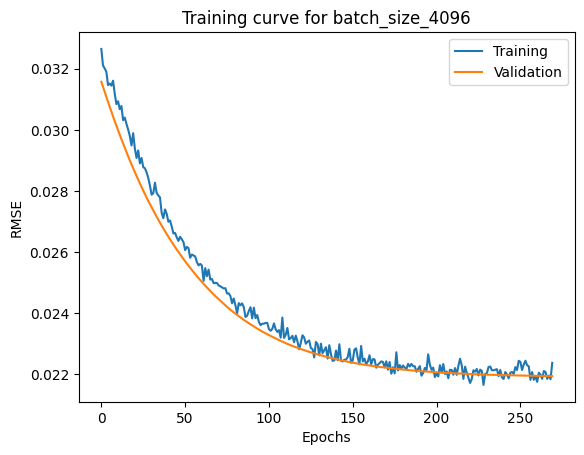

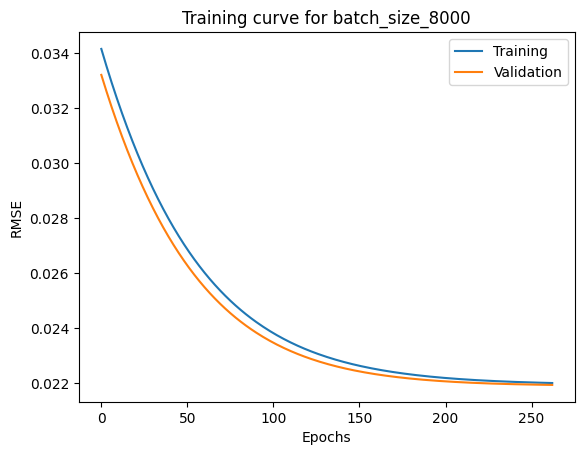

In [ ]:
for key in results.keys():

  if len(results[key][0])==1:
    plt.figure()
    plt.scatter(1 , results[key][0] , label = 'Training')
    plt.scatter(1 , results[key][1] , label = 'Validation')
    plt.title(f'Model converged in 1 epoch for {key}')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()
  else:
    plt.figure()
    plt.plot(results[key][0] , label='Training')
    plt.plot(results[key][1] , label ='Validation')
    plt.title(f'Training curve for {key}')
    plt.xlabel('Epochs')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()


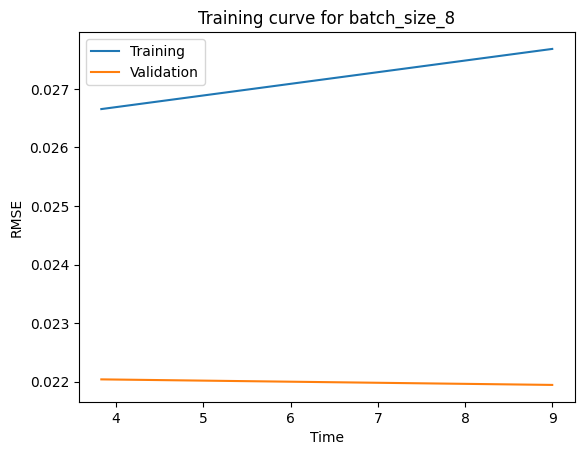

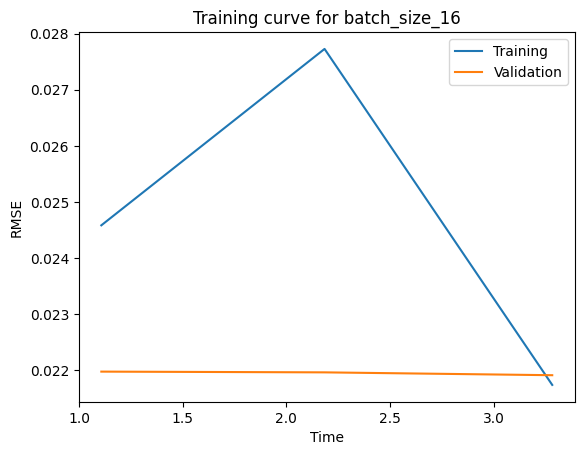

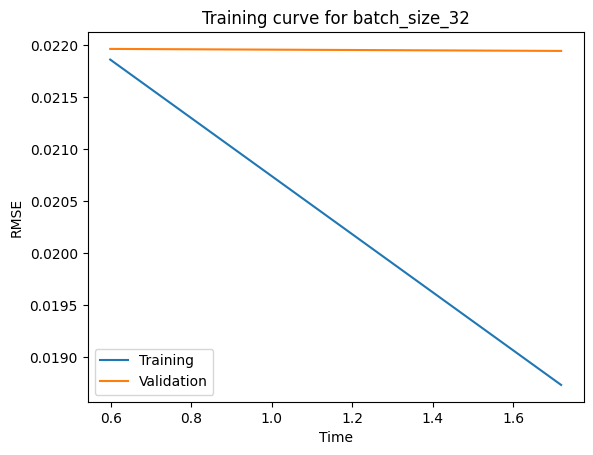

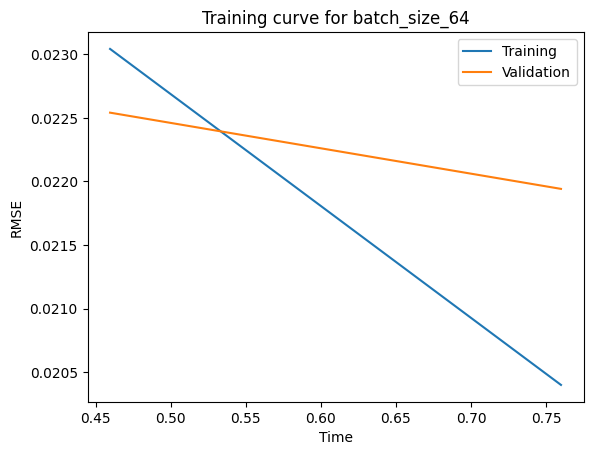

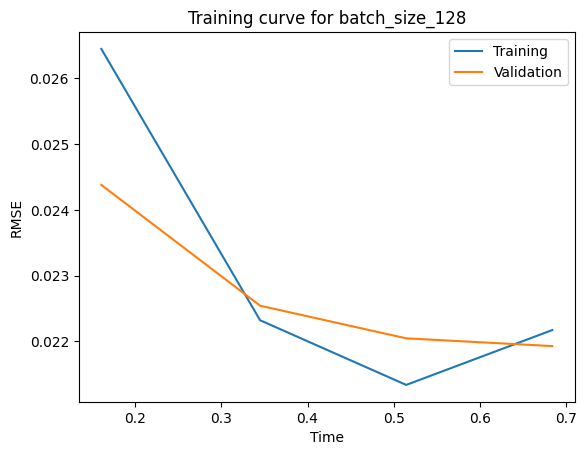

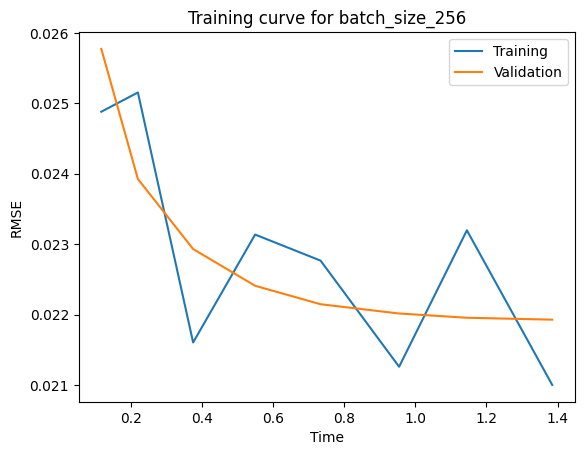

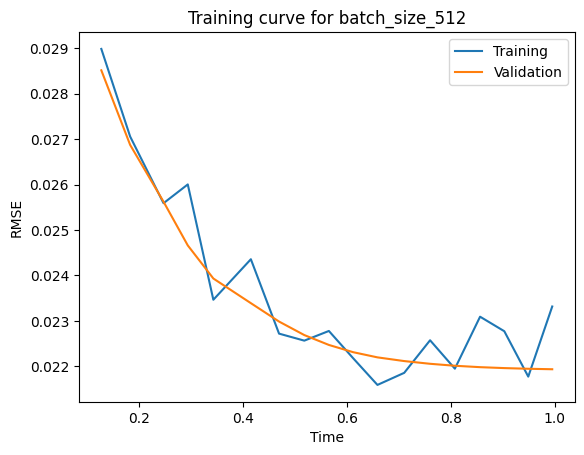

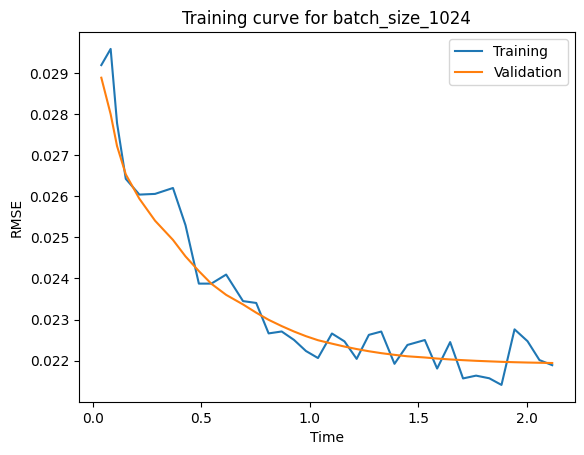

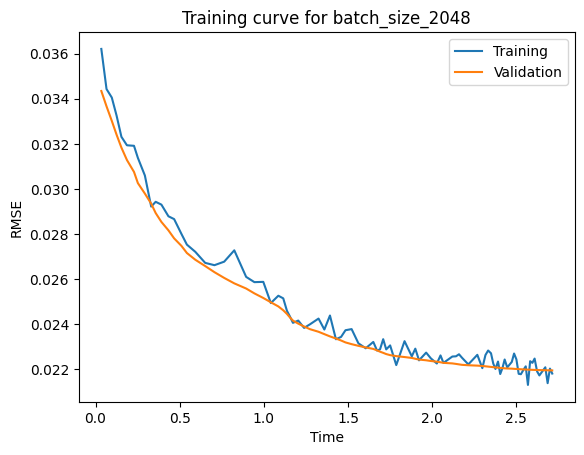

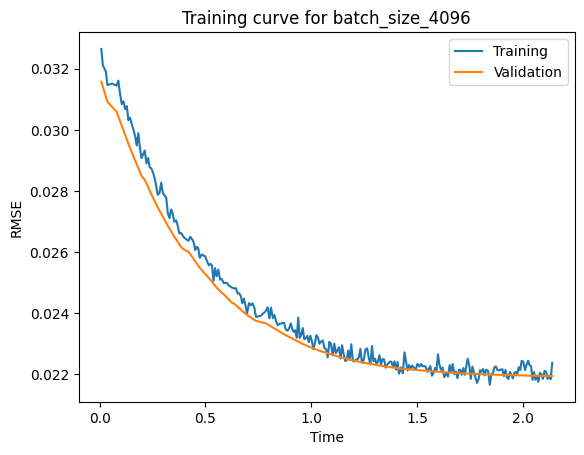

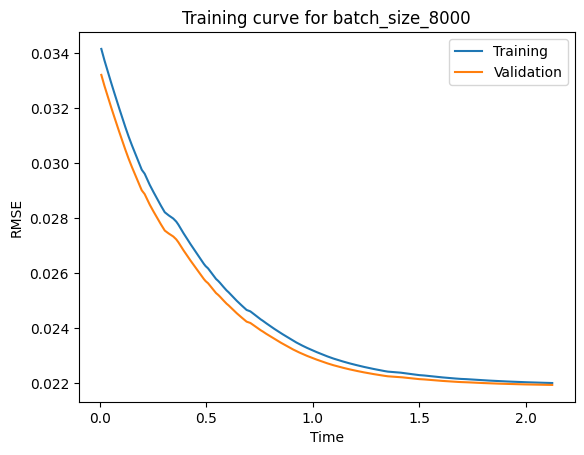

In [ ]:
for key in results.keys():
  plt.figure()
  plt.plot(results[key][2],results[key][0] , label='Training')
  plt.plot(results[key][2], results[key][1] , label ='Validation')
  plt.title(f'Training curve for {key}')
  plt.xlabel('Time')
  plt.ylabel('RMSE')
  plt.legend()
  plt.show()

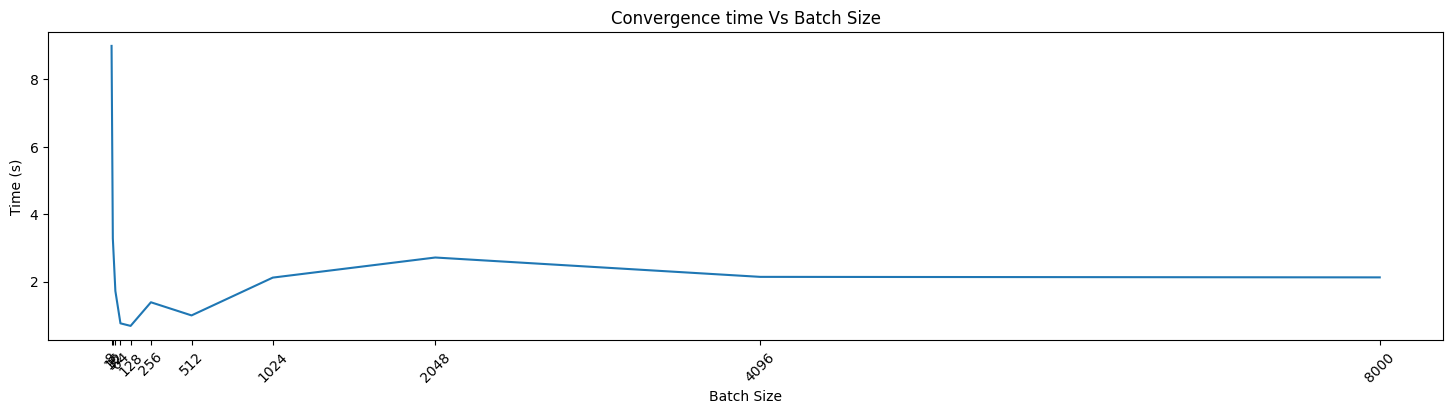

In [ ]:
time_list = []
for key in results.keys():
  time_list.append(results[key][2][-1])

plt.figure(figsize = (18,4))

plt.plot(batch_conv , time_list)

plt.title('Convergence time Vs Batch Size')
plt.xlabel('Batch Size')
plt.xticks(batch_conv , rotation = 45)
plt.ylabel('Time (s)')
plt.show()

## Part 5 - Gradient Descent Learning Rate [3 marks]
Use the function that you designed in Part 4 to investigate the effect of learning rate on convergence.

1. Pick 3 batch sizes that do not converge with a learning rate of $\alpha= 0.01$ (last part) and try to find a learning rate that results in convergence for each batch size. Report your findings in a table. Mention batch size, learning rate, and training and validation RMSE. **[1]**

2. Select the best batch size based on Part 4's fastest convergence time and sweep the learning rate (at least 10 values, all should converge) while applying Mini-batch GD.
  
  * Plot the training and validation RMSE vs. **epoch** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Plot the training and validation RMSE vs. **time** (x-axis) for all the learning rates that you tried in a figure. **[0.5]**
  * Describe your findings, including the main takeaways from each of your plots. **[1]**

    * In this section, I chose to plot a batch size of 128 (because of its fast convergence at the cost of training "stability") and 4096 because of its slightly slower convergence but increased stability.

    * Findings: It can be seen on the graphs that a high learning rate for a smaller batch size yields higher training epochs and more volatility in the training RMSe with respect to epoch. On the other hand, a higher learning rate for a bigger batch size yields the fastest convergence. This again could be due to the information that is captured in a bigger dataset and therefore the more acuracte update of the weights.

    * A smaller learning rate yields a better performance on the smaller batch size, whereas a a smaller learning rate on a bigger batch size yields a very slow convergence and an increased number of training epochs.

In [ ]:
### YOUR CODE HERE ###

# Question 1.

results_lr = {}
lr_range = [0.001,0.01, 0.05,0.1, 0.15 , 0.2 , 0.3, 0.4 , 0.5,1] # I do not like the linspace function in python

for batch in list(batch_not_conv):
  for lr in lr_range:
    print(lr)
    w , rmse_train_epoch , rmse_val_epoch , elapsed_time, did_converge = mini_gd(X_train_stand , y_train, X_val_stand , y_val, leaning_rate = lr,  batch_size = batch , ct = 1.001*mse_val_loss_direct)
    print(did_converge)

    if did_converge == 1:
      results_lr[f'batch_size_{batch}'] = [batch, lr , rmse_train_epoch[-1] , rmse_val_epoch[-1], elapsed_time[-1]]
      break



0.001
1
0.001
1
0.001
1


In [ ]:
index = [key for key in results_lr.keys()]
results_df = pd.DataFrame(results_lr.values() , columns = ['Batch Size' , 'Learning rate' , 'RMSE_train' , 'RMSE_val' , 'Time'] , index = index)
results_df

,Batch Size,Learning rate,RMSE_train,RMSE_val,Time
batch_size_1,1,0.001,0.003396,0.021903,53.952482
batch_size_2,2,0.001,0.008860,0.021927,8.932776
batch_size_4,4,0.001,0.013362,0.021937,9.224169


In [ ]:
# Question 2

# from the graph, it seems like a batch size of 128 yielded the fastest convergence speed. However the training curve is not the most stable.
# on the other hand, the minibatch equal to 4096 showed a better performance with respect to other batch sizes with a time slightly higher than a batch size of 128
# but a much more stable training curve.
# Assuming we can not choose the full batch size equal to 8000

# we will plot both and see the difference.

# note that the RMSE error is less volatile for the batch size of 4096 compared to 128 as the model learn better the distribution of data following shuffuling after every epoch

results_128 = {}
results_4096 = {}

for lr in lr_range:
  w , rmse_train_epoch , rmse_val_epoch , elapsed_time, did_converge = mini_gd(X_train_stand , y_train, X_val_stand , y_val, leaning_rate = lr,  batch_size = 128 , ct = 1.001*mse_val_loss_direct)
  results_128[f'batch_size_128_{lr}'] = [rmse_train_epoch , rmse_val_epoch, elapsed_time]

for lr in lr_range:
  w , rmse_train_epoch , rmse_val_epoch , elapsed_time, did_converge = mini_gd(X_train_stand , y_train, X_val_stand , y_val, leaning_rate = lr,  batch_size = 4096 , ct = 1.001*mse_val_loss_direct)
  results_4096[f'batch_size_4096_{lr}'] = [rmse_train_epoch , rmse_val_epoch, elapsed_time]

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:179: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims, where=where)


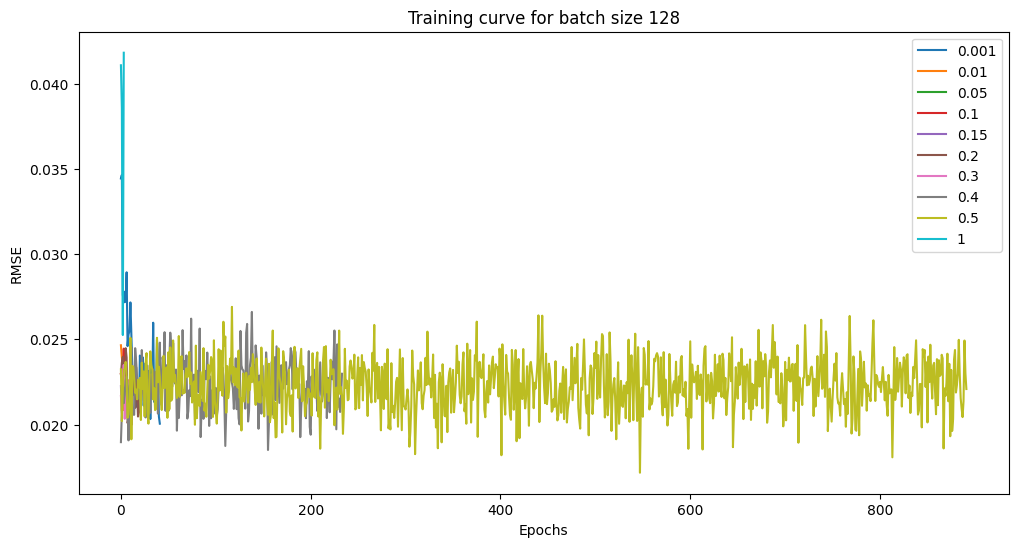

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_128.keys():
    plt.plot(results_128[key][0])

plt.title('Training curve for batch size 128')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

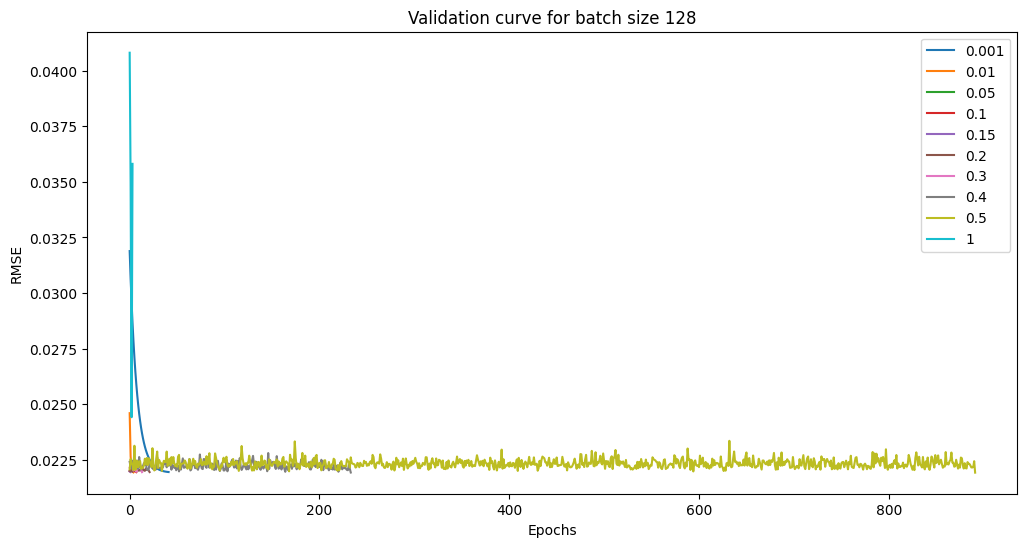

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_128.keys():
    plt.plot(results_128[key][1])

plt.title('Validation curve for batch size 128')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

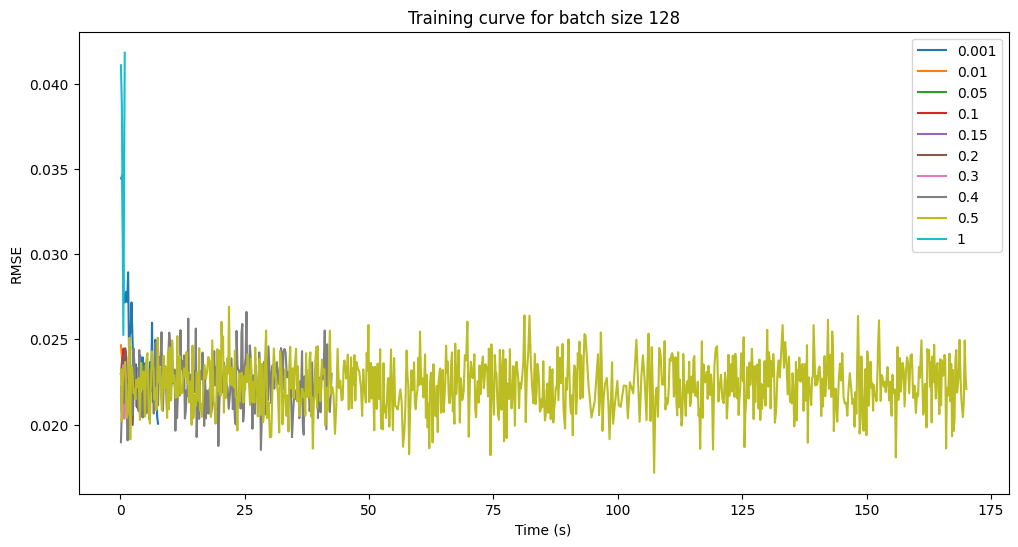

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_128.keys():
    plt.plot(results_128[key][2] , results_128[key][0])

plt.title('Training curve for batch size 128')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

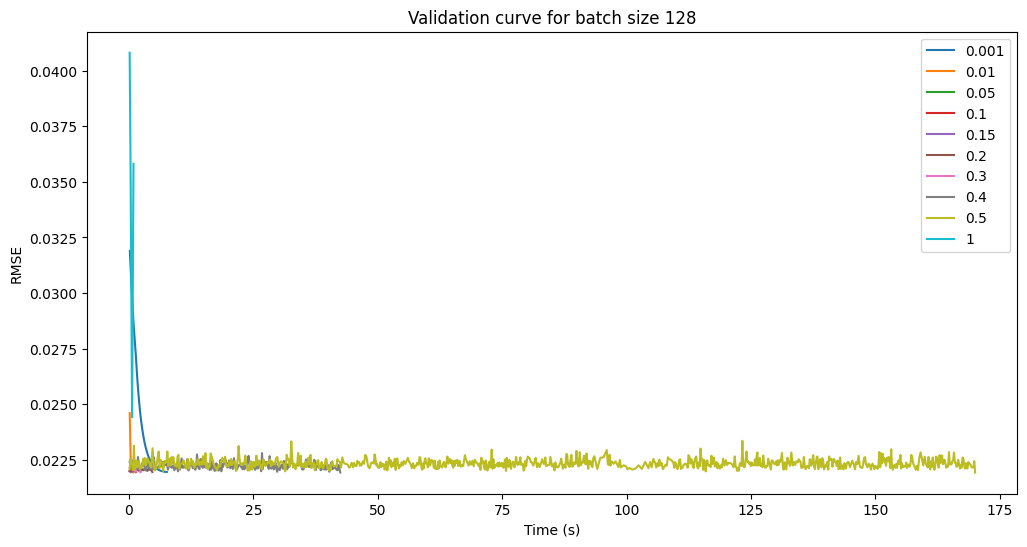

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_128.keys():
    plt.plot(results_128[key][2] , results_128[key][1])

plt.title('Validation curve for batch size 128')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

In [ ]:
results_4096.keys()

dict_keys(['batch_size_4096_0.001', 'batch_size_4096_0.01', 'batch_size_4096_0.05', 'batch_size_4096_0.1', 'batch_size_4096_0.15', 'batch_size_4096_0.2', 'batch_size_4096_0.3', 'batch_size_4096_0.4', 'batch_size_4096_0.5', 'batch_size_4096_1'])

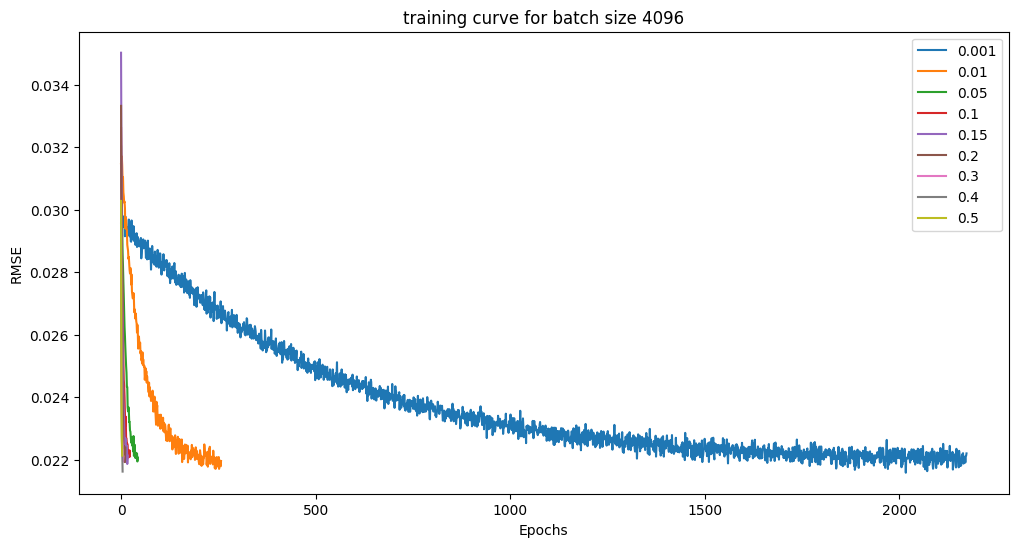

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_4096.keys():
  if key != 'batch_size_4096_1': # for some reason the error blows up to infinity for a learning rate equal to 1
    plt.plot(results_4096[key][0])

plt.title('training curve for batch size 4096')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(lr_range[:-1] , loc = 'upper right')
plt.show()

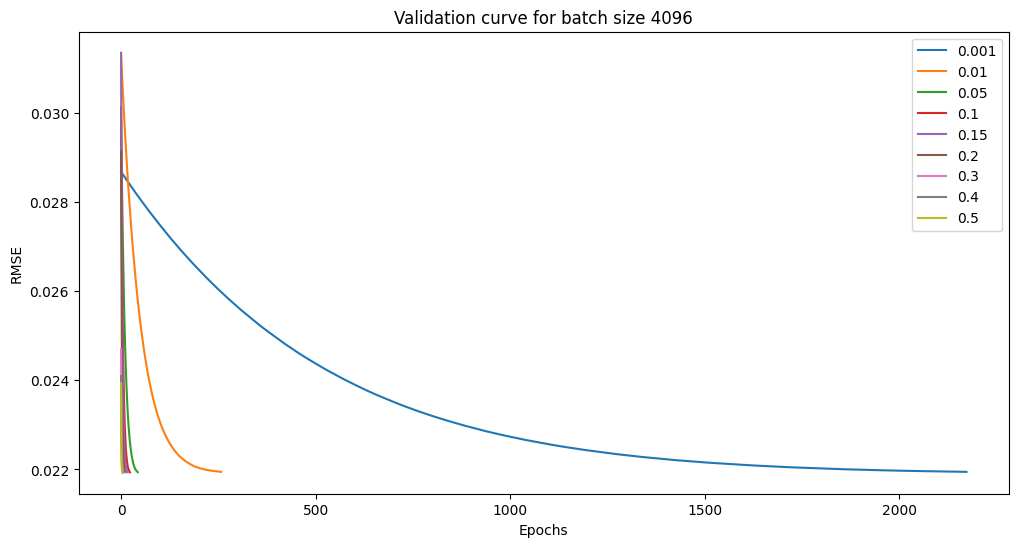

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_4096.keys():
  if key != 'batch_size_4096_1':
    plt.plot(results_4096[key][1])

plt.title('Validation curve for batch size 4096')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

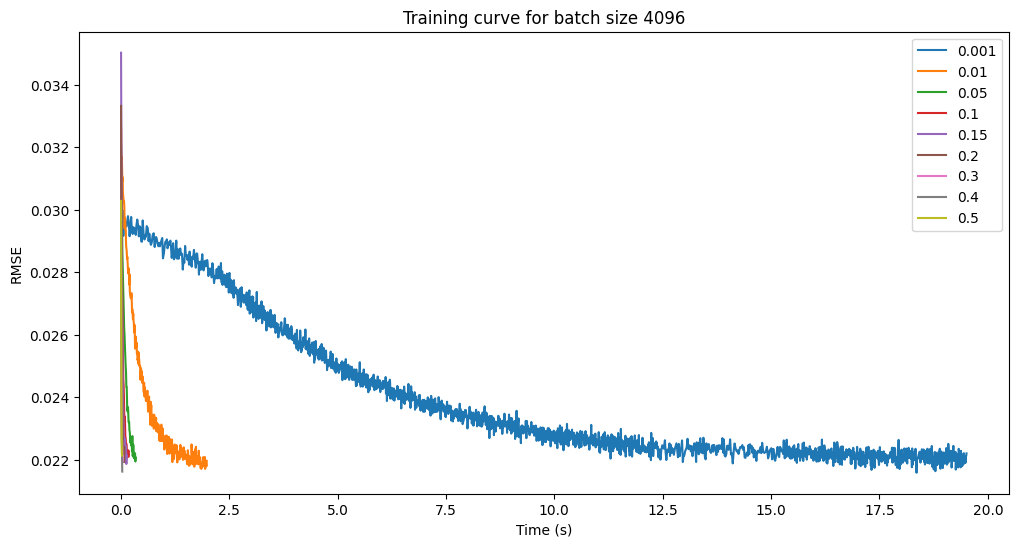

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_4096.keys():
  if key != 'batch_size_4096_1':
    plt.plot(results_4096[key][2] , results_4096[key][0])

plt.title('Training curve for batch size 4096')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

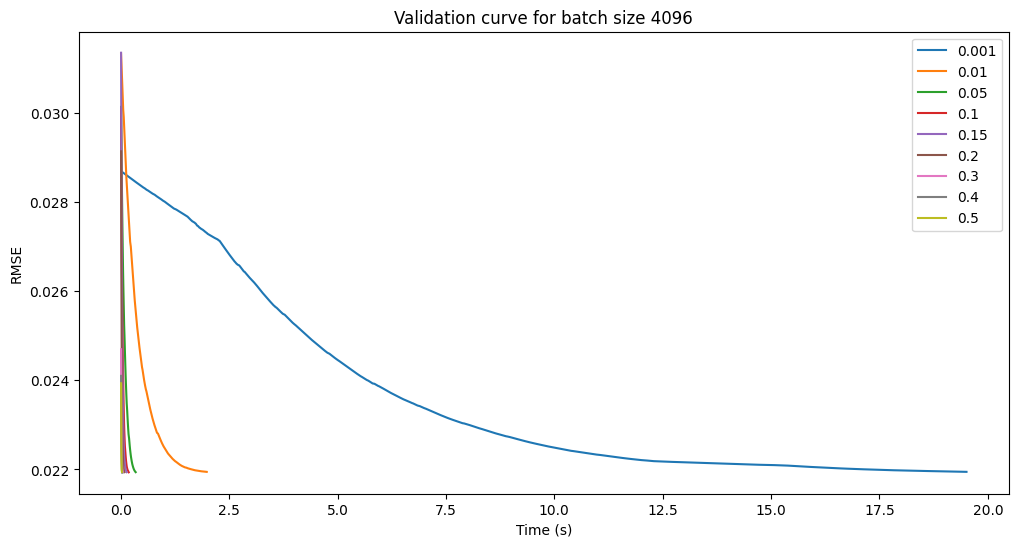

In [ ]:
plt.figure(figsize = (12, 6))
for key in results_4096.keys():
  if key != 'batch_size_4096_1':
    plt.plot(results_4096[key][2] , results_4096[key][1])

plt.title('Validation curve for batch size 4096')
plt.xlabel('Time (s)')
plt.ylabel('RMSE')
plt.legend(lr_range , loc = 'upper right')
plt.show()

## Part 6 - Getting started with Github  [3 marks]

This final part of the project assignment is to be completed independently from Parts 1 - 5. In this part you will be completing some additional coding tasks using a different dataset and submitting your results on Github. To access this part of the assignment and upload your answers, you will need to use Github. Please complete the following step-by-step instructions:

 0. Create a Github account and install git for Windows or Mac:
  * https://git-scm.com/download/win
  * https://git-scm.com/download/mac

 1. Open this link: https://classroom.github.com/a/owI3c1qy to create your assignment repository in GitHub. You should get a link similar to:
```
https://github.com/APS1070-S23-Project-4/project-4-sdt2022-code
```
This your private repository to get this part questions and upload your answers. **Copy this link to the text box below to be graded for this part.**


 2. Open `Git Bash`, the app you downloaded in step `0`, and set your Email and username by:
```
git config --global user.email “<your-GitHub-email>”
git config --global user.name “<your-GitHub-username>”
```

 3. Create a folder for the course on your computer and `cd` to that. `cd` means `Change Directory`. For example, on a Windows machine, where I have a folder on "C:\aps1070":
 ```
cd c:aps1070
```
 4. Get your assignment by the link you got in step 1:
```
git clone https://github.com/APS1070-S23-Project-4/project-4-sdt2022-code
```

 5. A new folder should be created in your directory similar to:
```
C:\aps1070\project-4-********
```
This folder has an `ipynb` notebook which you need to manually upload to colab and answer its questions.

 6. After you finished working on this notebook, download the notebook from colab and move it to the directory in step 5.

 7. Replace the old notebook with the new one that has your answers. Make sure your completed notebook has the same name as the original notebook you downloaded.

 8. To submit your work, follow:
```
cd <your assignment folder>
git add S23_Project_4_git.ipynb
git commit -m “Final Submission”
git push
```
If you had any problem with pushing your work on GitHub you can try one of following commands:
```
git push --force
or
git push origin HEAD:main
```

 9. Make sure your submission is ready for grading. Open the private repository link in your browser and make sure you can see your final submission with your latest changes there. **Only you and the teaching team can open that link.**